# 计算物理基础 第七章 课后习题

In [ ]:
import numpy as np, matplotlib.pyplot as plt

### 1.
对热传导方程一节中的例子如下，
以有限长细杆的热传导问题为例显示差分公式，定解问题公式为

$$
\begin{cases} 
u_t = a^2 u_{xx} \\
u(0, t) = 0, \quad u(l, t) = 0 \\
u(x, t = 0) = \varphi(x) 
\end{cases}
$$
其中 $l = 20$， $t = 25$， $a^2 = 10$ 且

$$
\varphi(x) = 
\begin{cases} 
1 & (10 \leqslant x \leqslant 11) \\
0 & (x < 10, x > 11) 
\end{cases}
$$

计算不稳定的情况。

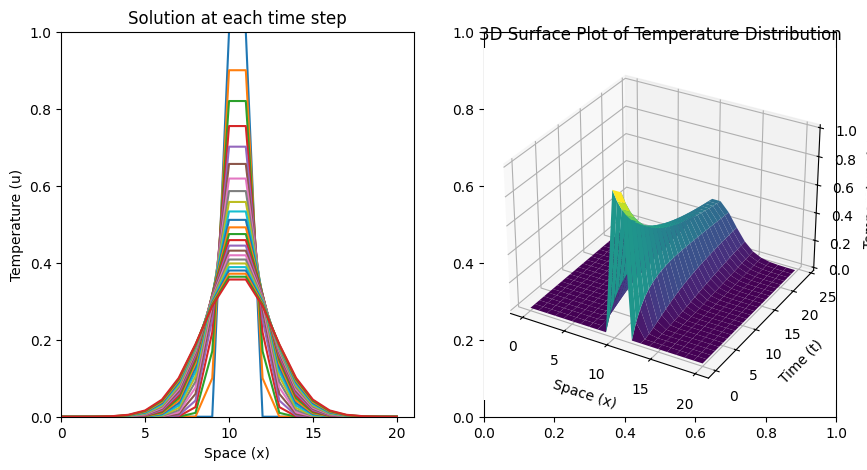

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化参数
Nx=20
Nt=25
x = np.arange(Nx+1)  # 对应 MATLAB 的 x=0:20，生成 0 到 20 的整数数组
a2 = 10
r = a2 * 0.01

# 预设矩阵以存放求得的解，行数对应 x 的数量，列数对应时间步数
u = np.zeros((Nx+1, Nt))  

# 初始条件，对应 MATLAB 的 u(10:11,1)=1，注意 Python 索引从 0 开始
u[10:12, 0] = 1  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 求解及绘图循环，对应 MATLAB 的 for j=1:25
for j in range(Nt-1):  # 因为 Python 中索引到 23 对应第 24 次迭代，来填充 u 的 2 到 25 列（索引 1 到 24）
    # 执行差分更新，对应 MATLAB 的 u(2:20,j+1)=(1-2*r)*u(2:20,j)+r*( u(1:19,j)+ u(3:21,j));
    u[1:-1, j + 1] = (1 - 2 * r) * u[1:-1, j] + r * (u[:-2, j] + u[2:, j])  
    
    # 绘图，对应 MATLAB 的 plot(x,u(:,j)); axis([0 21 0 1]); pause(0.1)
    ax1.plot(x, u[:, j])
    ax1.axis([0, 21, 0, 1])
    ax1.set_title('Solution at each time step')
    ax1.set_xlabel('Space (x)')
    ax1.set_ylabel('Temperature (u)')
    #plt.pause(0.01) # 调整暂停时间以平滑动画
    #ax1.cla()  # 清空当前轴，为下一次绘图做准备

# 绘制 3D 曲面图，对应 MATLAB 的 meshz(u)
ax2 = fig.add_subplot(1, 2, 2, projection='3d') # 确保ax2是3D投影
t = np.arange(Nt)  # 定义时间步数，使用Nt
X, Y = np.meshgrid(x, t)  # x对应空间，t对应时间
ax2.plot_surface(X, Y, u.T, cmap='viridis')  # 需要转置u以匹配网格维度
ax2.set_title('3D Surface Plot of Temperature Distribution')
ax2.set_xlabel('Space (x)')
ax2.set_ylabel('Time (t)')
ax2.set_zlabel('Temperature (u)')
plt.show()

### 2. 
对弦振动方程的例子计算不稳定的情况。

### 3. 解方程
$$
\begin{cases} 
u_{xx} + u_{yy} = x\text{e}^y \quad (0 < x < 2, 0 < y < 1) \\
u(0, y) = 0, \quad u(2, y) = 2\text{e}^y \\
u(x, 0) = x, \quad u(x, 1) = \text{e}x 
\end{cases}
$$
取$\Delta x = 1/3, \Delta y = 1/5$。

### 4. 解方程
$$
\begin{cases} 
u_t = u_{xx} & (0 < x < 1, 0 < t < 0.5) \\
u(x, 0) = \sin \pi x \\
u(0, t) = u(1, t) = 0 
\end{cases}
$$

分别取 $\Delta x = 0.1, \Delta t = 0.01$ 和 $\Delta x = 0.1, \Delta t = 0.001$ 进行计算。并与解析解 $u(x, t) = \exp(-\pi^2t)\sin(\pi x)$ 比较。

### 5. 用差分法和 PDETOOL 解方程

$$
\begin{cases} 
u_{tt} = a^2 u_{xx} \quad (0 < x < l, 0 < t) \\
u(0, t) = 0, \quad u(l, t) = A \sin \omega t \\
u(x, 0) = 0, \quad u_t(x, 0) = 0 
\end{cases}
$$

问题中的参数由自己选择。

### 6. 
在圆域$\rho < a$上用偏微分方程工具箱求解方程$\triangle u = -xy$，边界条件是$u(\rho = 0) = 0$。

### 7. 用偏微分方程工具箱求解如下的定解问题

$$
\begin{cases} 
u_t = a^2 u_{xx} \\
u(0, t) = 0, \quad u_x(l, t) = 0 \\
u(x, 0) = u_0 x / l 
\end{cases}
$$

### 8. 用辛普森积分公式和高斯-勒让德求积公式计算

$$\int_{-1}^{1} (1 - x^2)^{1/2} \text{d}x = \frac{\pi}{2}$$

注意对被积函数在 $x = \pm1$ 附近的行为需要特别小心。对不同的坐标点数，比较这些方法的精度和效率。注意这个积分可以用一个“1”点的高斯-切比雪夫求积公式准确求值，这个公式的形式为

$$\int_{-1}^{1} (1 - x^2)^{1/2} f(x) \text{d}x = \sum_{n = 1}^{N} w_n f(x_n)$$

其中

$$x_n = \cos \frac{n}{N + 1}\pi, \quad w_n = \frac{\pi}{N + 1} \sin^2 \frac{n}{N + 1}\pi$$ 


## 特殊函数作图

### 9.
根据量子力学，一维线性谐振子的波函数是
$$\psi_n=N_nH_n(\xi)e^{-\frac{1}{2}\xi^2},\quad n=0,1,2,\cdots$$
其中$N_n$为归一化常数, $H_n(\xi)$是厄米多项式. 画出谐振子的前四个波函数(作图时可以不必考虑$N_n$), 并将图形与5.10.3节数值计算所得图形做比较.

#### 解

In [ ]:
from scipy.special import hermite
x = np.linspace(-10,10,100)
for n in range(4):
    Hn = hermite(n)
    psi = Hn(x)*np.exp(-0.5*x*x)
    plt.subplot(2,2,n+1)
    plt.plot(x,psi)

### 10.
均匀细圆环, 半径为$a$, 环上带有$4\pi\varepsilon_0q$单位的电荷, 它在空间的电势分布为
$$
u(r,\theta)=\begin{cases}
\frac{q}{a}\sum\limits_{l=0}^{\infty}(-1)^l\frac{(2l)!}{2^{2l}l!l!}\left(\frac{r}{a}\right)^{2l}P_{2l}(\cos\theta)&(r<a)\\
\frac{q}{a}\sum\limits_{l=0}^{\infty}(-1)^l\frac{(2l)!}{2^{2l}l!l!}\left(\frac{a}{r}\right)^{2l+1}P_{2l}(\cos\theta)&(r>a)\\
\end{cases}
$$
画出空间的电场线分布.

#### 解
首先球电势分布

In [ ]:
from scipy.special import legendre,factorial
a = 1
q = 1
xx,yy = np.mgrid[-2:2:100j,-2:2:100j]
r,theta = np.sqrt(xx**2+yy**2), np.arctan2(yy, xx) #直角坐标转化成极坐标
N = 30 #求和的项数
u = 0
for l in range(N):
    f = np.where((r<a),(r/a)**(2*l),(a/r)**(2*l+1)) #当r<a和r>a分别选择不同的因子，其它项相同
    legendre2l = legendre(2*l)
    u += (-1)**l*factorial(2*l)/factorial(l)/factorial(l)/2**(2*l)*f*legendre2l(np.cos(theta))

#### 画电势的三维图像

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,u)

#### 画电势的强度图

In [ ]:
plt.imshow(u)

#### 画空间电场分布

In [ ]:
EX, EY=np.gradient(-u,1)
plt.contour(xx,yy, u)
plt.streamplot(xx.T,yy.T, EX.T, EY.T, linewidth=1,cmap='rainbow',density=1, arrowstyle='->', arrowsize=1.5) #线性流形